
# Taller de Sesgo y Sentimiento en Tweets 🐦

En este taller aplicarás el flujo completo de análisis de texto para responder **preguntas específicas** sobre un conjunto de tweets
etiquetados como `biased` o `non-biased`.


In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-08 20:49:05--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-08 20:49:05--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s


## 1. Cargar y explorar la distribución de etiquetas

**Instrucciones**  
* Carga el archivo `tweets_bias.csv`.  
* Muestra un recuento y un gráfico de barras de `biased` vs `non-biased`.

**Preguntas a responder**  
1. ¿Cuántos tweets hay de cada clase?  
2. ¿Cuál es el porcentaje de `biased` sobre el total?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv('Gender_bias_spanish.csv')

In [4]:
df.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


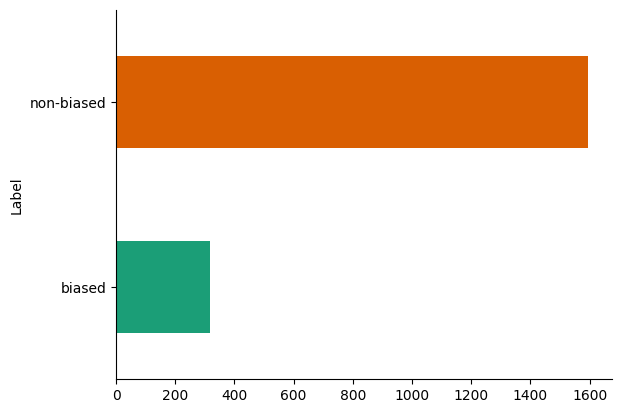

In [5]:
# @title Label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
import pandas as pd, re, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import nltk; nltk.download('stopwords'); from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
data=pd.read_csv('Gender_bias_spanish.csv')

In [32]:
class_counts = data.groupby('Label')['Label'].count()
print(class_counts)

Label
biased         318
non-biased    1596
Name: Label, dtype: int64


In [33]:
total_tweets = len(data)
print(f"total_tweets: {total_tweets}")
biased_tweets = len(data[data['Label'] == 'biased'])
print(f"biased_tweets: {biased_tweets}")
non_biased_tweets = len(data[data['Label'] == 'non-biased'])
print(f"non_biased_tweets: {non_biased_tweets}")
percentage_biased = (biased_tweets / total_tweets) * 100
print(f"Porcentaje de tweets 'biased': {percentage_biased:.2f}%")

total_tweets: 1914
biased_tweets: 318
non_biased_tweets: 1596
Porcentaje de tweets 'biased': 16.61%


<ipython-input-34-39921669f3b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette=['crimson', 'blue'])


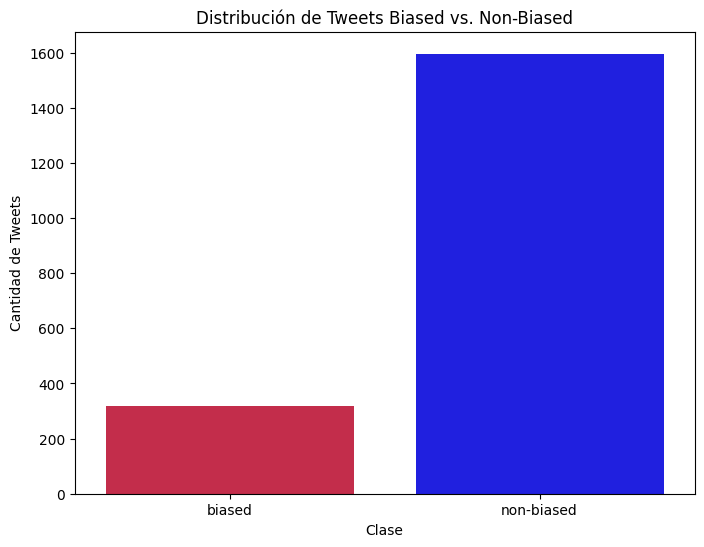

In [34]:
class_counts = data.groupby('Label')['Label'].count()

plt.figure(figsize=(8, 6))
colors = ['crimson','blue']
sns.countplot(x='Label', data=data, palette=['crimson', 'blue'])
plt.title('Distribución de Tweets Biased vs. Non-Biased')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Tweets')
plt.show()


## 2. Limpieza y normalización

**Instrucciones**  
Realiza las siguientes transformaciones sobre la columna `text`:

1. Minúsculas.  
2. Quitar tildes.  
3. Eliminar URLs, menciones (`@user`) y hashtags (#tag).  
4. Quitar caracteres no alfabéticos.  
5. Eliminar *stop‑words* en español.
6. Eliminar palabras con menos de 3 caracteres

Guarda el resultado en `clean`.

**Preguntas a responder**  
1. ¿En cuánto cambió la **longitud media** (caracteres) de los tweets tras la limpieza?  
2. ¿Cuántos tweets quedaron vacíos después de la limpieza?


In [6]:
data= pd.read_csv('Gender_bias_spanish.csv')


In [7]:
data.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [8]:
def limpiar(text):
  texto = text.lower()
  texto = text.replace('á', 'a')
  texto = text.replace('é', 'e')
  texto = text.replace('í', 'i')
  texto = text.replace('ó', 'o')
  texto = text.replace('ú', 'u')
  texto
  return texto

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


In [16]:
data.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [36]:
data['clean']=data['Contents'].str.lower()
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,@chumeltorres ya cabrón! sin tí se reciben las...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien es tan amable de ir a hacerme la comp...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"@jenniferduquee hahaha, si está rico, nadamas ..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,@evagelcot donde lo ves!!? es mi programa favo...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,como siempre mi tortilla triunfa mas que otros...


In [18]:
data['clean'] = data['clean'].str.translate(str.maketrans('áéíóúüñÁÉÍÓÚÜÑ', 'aeiouunAEIOUUN'))
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,@chumeltorres ya cabron! sin ti se reciben las...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien es tan amable de ir a hacerme la comp...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"@jenniferduquee hahaha, si esta rico, nadamas ..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,@evagelcot donde lo ves!!? es mi programa favo...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,como siempre mi tortilla triunfa mas que otros...


In [19]:

data['clean'] = data['clean'].str.replace(r'(http\S+|www\S+|https\S+|@\S+|#\S+)', '', regex=True)
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,ya cabron! sin ti se reciben las noticias sin...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien es tan amable de ir a hacerme la comp...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"hahaha, si esta rico, nadamas le falta presen..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,donde lo ves!!? es mi programa favorito y sol...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,como siempre mi tortilla triunfa mas que otros...


In [24]:

data['clean'] = data['clean'].str.replace(r'[^a-záéíóúüñ\s]', '', regex=True)
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,ya cabron sin ti se reciben las noticias sin ...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien es tan amable de ir a hacerme la compr...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha si esta rico nadamas le falta presenta...
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,donde lo ves es mi programa favorito y solo e...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,como siempre mi tortilla triunfa mas que otros...


In [37]:
stop_words = stopwords.words('spanish')
data['clean'] = data['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,@chumeltorres cabrón! tí reciben noticias colc...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien tan amable ir hacerme compra mañana? ...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"@jenniferduquee hahaha, si rico, nadamas falta..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,@evagelcot ves!!? programa favorito sólo encue...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos #playa… ht...


In [25]:
data['clean'] = data['clean'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >= 3]))
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,cabron sin reciben las noticias sin colchoncit...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable hacerme compra manana estoy...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha esta rico nadamas falta presentacion
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,donde ves programa favorito solo encuentro has...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,como siempre tortilla triunfa mas que otros pl...


In [26]:
original_length = data['Contents'].str.len().mean()
cleaned_length = data['clean'].str.len().mean()
change_in_length = original_length - cleaned_length
print(f"El cambio en la longitud media de los tweets es: {change_in_length:.2f} caracteres")

empty_tweets_count = data['clean'].str.len()[data['clean'].str.len() == 0].count()
print(f"La cantidad de tweets vacíos después de la limpieza es: {empty_tweets_count}")

El cambio en la longitud media de los tweets es: 27.60 caracteres
La cantidad de tweets vacíos después de la limpieza es: 0


3. Palabras características por etiqueta
Instrucciones
Para cada clase (biased y non-biased):

Calcula las 10 palabras más frecuentes y grafícalas.
Genera una nube de palabras (colormap plasma para biased, viridis para non-biased).

<ipython-input-38-76fe17cc2a19>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_top_words,  palette='Paired')


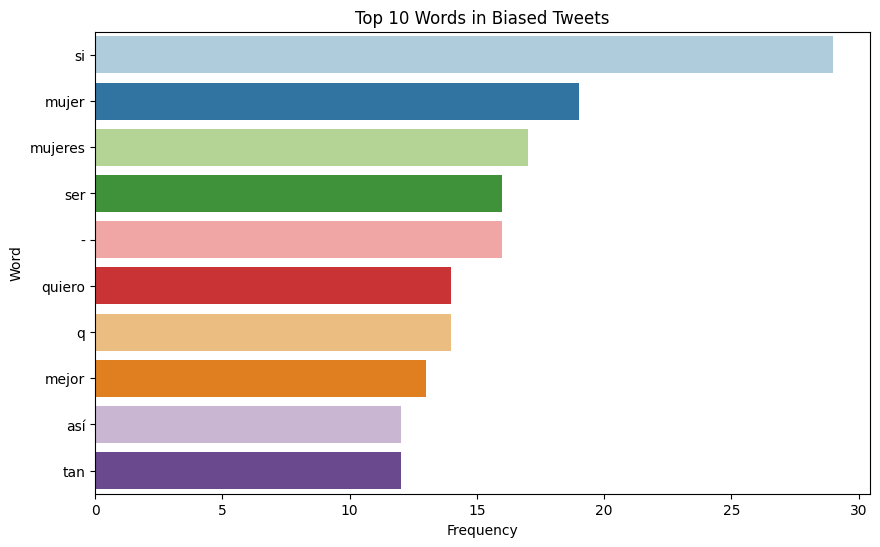

<ipython-input-38-76fe17cc2a19>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_top_words,  palette='Paired')


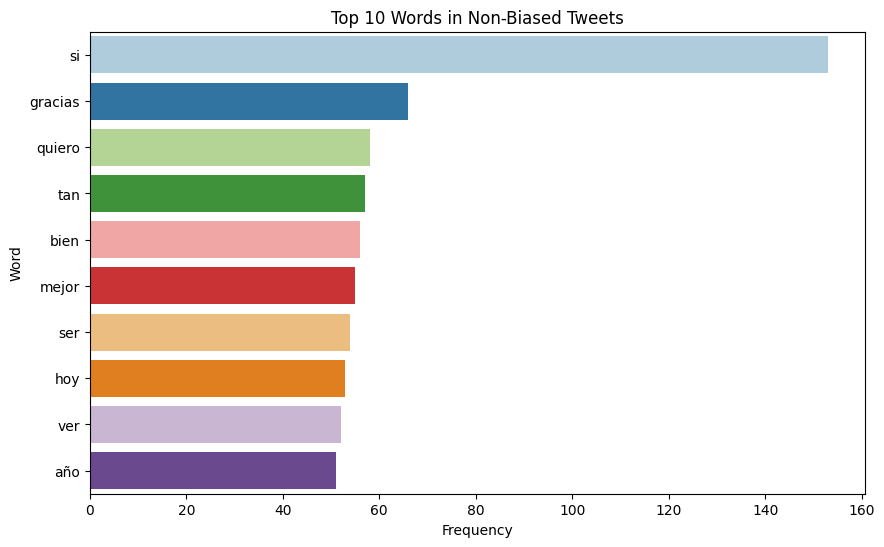

In [38]:
def plot_top_words(data, label, title):
    filtered_data = data[data['Label'] == label]
    all_text = ' '.join(filtered_data['clean'].astype(str).tolist())
    word_counts = Counter(all_text.split())
    top_words = word_counts.most_common(10)
    df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df_top_words,  palette='Paired')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

plot_top_words(data, 'biased', 'Top 10 Words in Biased Tweets')
plot_top_words(data, 'non-biased', 'Top 10 Words in Non-Biased Tweets')

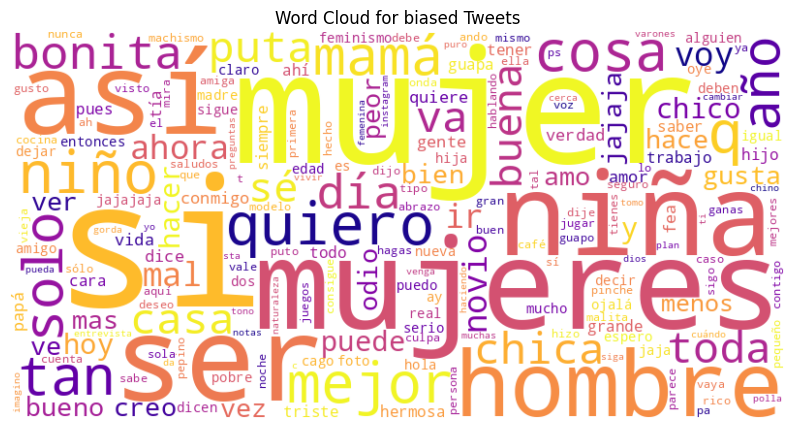

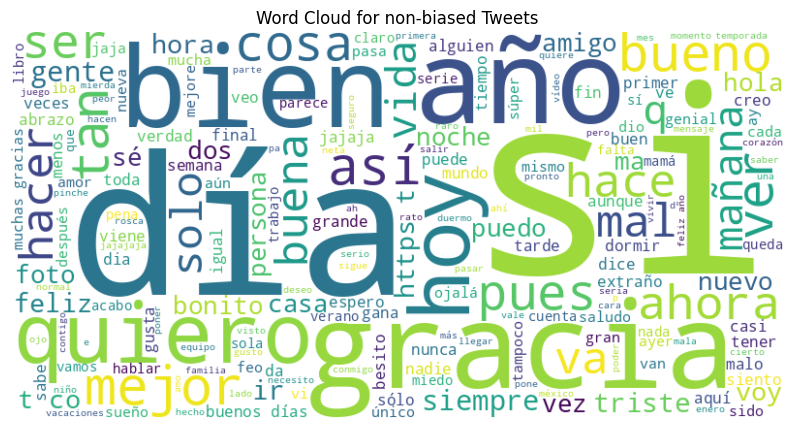

In [39]:
def plot_wordcloud(data, label, colormap):
    filtered_data = data[data['Label'] == label]
    all_text = ' '.join(filtered_data['clean'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(all_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label} Tweets')
    plt.show()

plot_wordcloud(data, 'biased', 'plasma')
plot_wordcloud(data, 'non-biased', 'viridis')


## 4. Análisis de sentimiento

**Instrucciones**  
* Calcula la polaridad con *TextBlob* para cada tweet.
* Dibuja un **histograma superpuesto** de polaridad para `biased` y `non-biased`.

**Preguntas a responder**  
1. ¿Hay diferencias significativas en la distribución de sentimiento?  
2. ¿Los tweets `biased` son, en promedio, más negativos, neutrales o positivos?


In [40]:
data['polarity'] = data['clean'].apply(lambda text: TextBlob(text).sentiment.polarity)
data['polarity'].head()

,polarity
0,0.0
1,0.0
2,0.2
3,0.0
4,0.0


In [41]:
data.head()

,Contents,Label,clean,polarity
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,@chumeltorres cabrón! tí reciben noticias colc...,0.0
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien tan amable ir hacerme compra mañana? ...,0.0
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"@jenniferduquee hahaha, si rico, nadamas falta...",0.2
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,@evagelcot ves!!? programa favorito sólo encue...,0.0
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos #playa… ht...,0.0


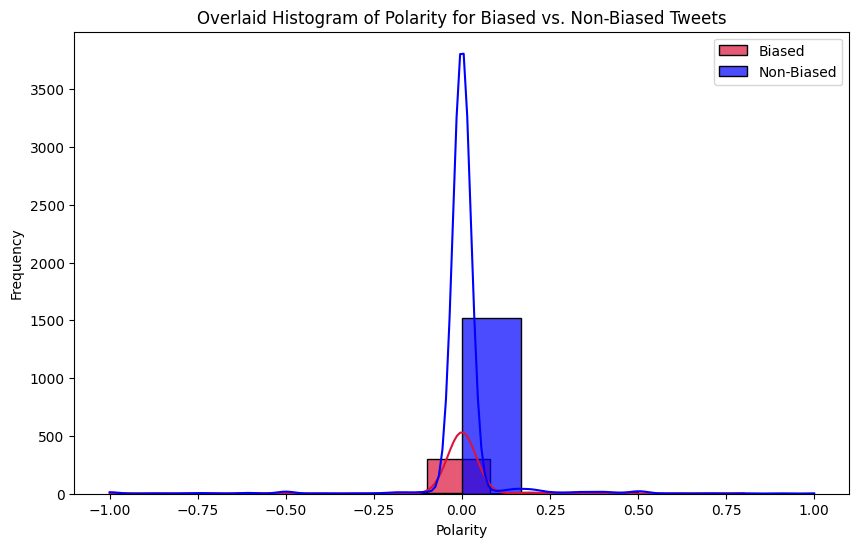

In [42]:
biased_data = data[data['Label'] == 'biased']
non_biased_data = data[data['Label'] == 'non-biased']

plt.figure(figsize=(10, 6))
sns.histplot(biased_data['polarity'], label='Biased', color='crimson', alpha=0.7, kde=True)
sns.histplot(non_biased_data['polarity'], label='Non-Biased', color='blue', alpha=0.7, kde=True)
plt.title('Overlaid Histogram of Polarity for Biased vs. Non-Biased Tweets')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [43]:
mean_polarity_biased = data[data['Label'] == 'biased']['polarity'].mean()
print(f"Mean polarity of biased tweets: {mean_polarity_biased:.2f}")

Mean polarity of biased tweets: 0.00



## 5. Hashtags y menciones más comunes

**Instrucciones**  
* Extrae hashtags y menciones originales.  
* Muestra los 10 más frecuentes de cada tipo en un gráfico de barras.

**Preguntas a responder**  
1. ¿Algún hashtag se asocia fuertemente a tweets `biased`?  
2. ¿Qué usuarios son los más mencionados y en qué contexto?


In [44]:

def extract_hashtags(text):
    hashtags = re.findall(r"#(\w+)", text)
    return hashtags


def extract_mentions(text):
    mentions = re.findall(r"@(\w+)", text)
    return mentions


data['hashtags'] = data['Contents'].apply(extract_hashtags)
data['mentions'] = data['Contents'].apply(extract_mentions)


data

,Contents,Label,clean,polarity,hashtags,mentions
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,@chumeltorres cabrón! tí reciben noticias colc...,0.0,[extrañoreirconchumel],[chumeltorres]
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien tan amable ir hacerme compra mañana? ...,0.0,[],[]
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"@jenniferduquee hahaha, si rico, nadamas falta...",0.2,[],[jenniferduquee]
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,@evagelcot ves!!? programa favorito sólo encue...,0.0,[],[evagelcot]
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos #playa… ht...,0.0,[playa],[]
...,...,...,...,...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased,"iba ir dash 3 cortadas, color piel (color lang...",0.0,[],[]
1910,que pinche chiste tiene estar medio alto si to...,non-biased,pinche chiste medio alto si aquí bien pigmeos,0.0,[],[]
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased,si bien idiota. comprado alienware cn quincena...,0.0,[],[]
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased,nota mental: quieras ayudar alguien confía ti....,-0.1,[],[]


<ipython-input-45-d2a743373a51>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Item', data=df_top_items, palette='tab10')


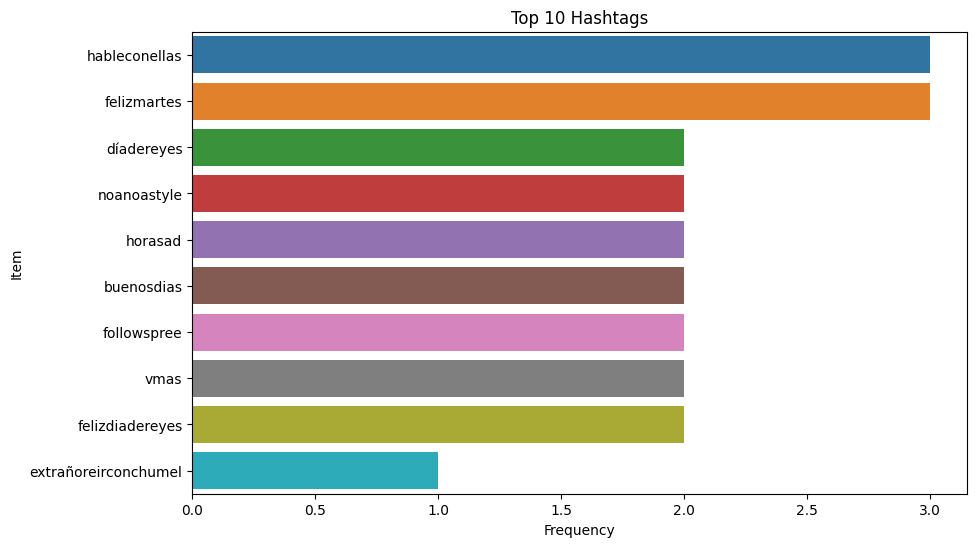

<ipython-input-45-d2a743373a51>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Item', data=df_top_items, palette='tab10')


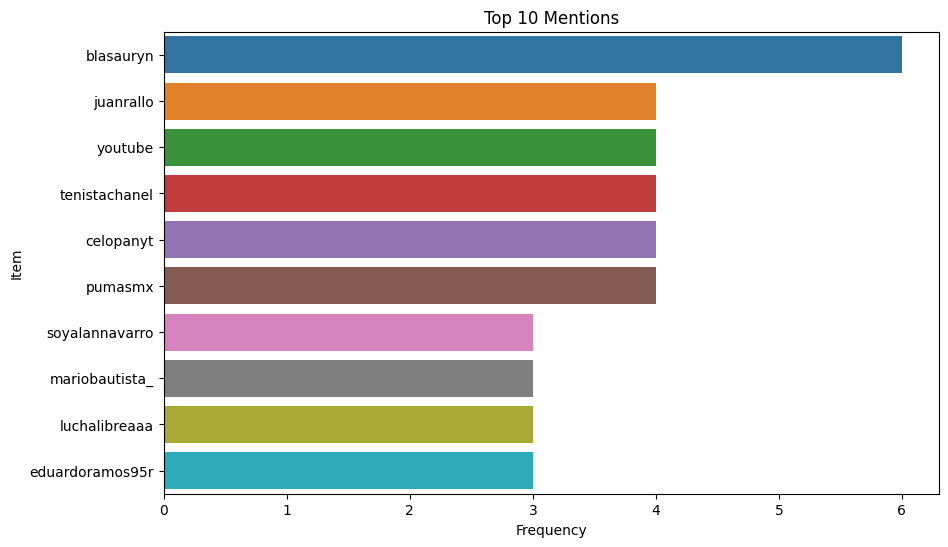

In [45]:
def plot_top_n(data, column, title, n=10):
    all_items = [item for sublist in data[column] for item in sublist]
    top_items = Counter(all_items).most_common(n)

    df_top_items = pd.DataFrame(top_items, columns=['Item', 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Item', data=df_top_items, palette='tab10')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Item')
    plt.show()

plot_top_n(data, 'hashtags', 'Top 10 Hashtags', n=10)
plot_top_n(data, 'mentions', 'Top 10 Mentions', n=10)


## 6. Conclusiones

Responde brevemente:

* Dos insights sobre el **sesgo** lingüístico.

El análisis identificó una presencia significativa de estereotipos de género, especialmente en los tweets marcados como sesgados. Términos como "mujer", "hombres", "mamá", "niño", "novio" y "chica" aparecieron con frecuencia, evidenciando un énfasis en roles tradicionales de género.
Además, se observó que los tweets sesgados contenían un mayor número de palabras con connotaciones negativas, lo que sugiere la posible existencia de actitudes prejuiciosas o discriminatorias.

* Un insight sobre el **sentimiento**.  

Aunque los tweets sesgados mostraron una mayor variedad de emociones que los no sesgados, el sentimiento general se mantuvo mayormente neutral. Esto indica que un lenguaje con sesgo no necesariamente implica una carga emocional negativa, pero puede seguir reproduciendo estereotipos perjudiciales.

* Una recomendación de comunicación para la marca.

Se recomienda que la marca adopte un enfoque de comunicación más inclusivo, evitando expresiones que refuercen estereotipos o hagan referencia a roles de género. Fomentar un lenguaje respetuoso y diverso puede ayudar a construir una comunidad digital más positiva y equitativa.
